In [1]:
import numpy as np
from gcs import GCSforBlocks


from pydrake.geometry.optimization import Point
from pydrake.geometry.optimization import Iris

In [ ]:
sample = np.array([1,1,1])
domain = 

Adding layers: 100%|█████████████████████████████| 9/9 [00:00<00:00, 203.69it/s]


Solving...
Solving GCS took 1.29 seconds
Optimal cost is 30.0
-----------------------
Solution is:
-----------------------
Start at [1.]
Move to [1.] ; 
Move to [7.] ; Grasp   block 3
Move to [1.] ; Ungrasp block 3
Move to [3.] ; Grasp   block 1
Move to [5.] ; Ungrasp block 1
Move to [5.] ; Grasp   block 2
Move to [3.] ; Ungrasp block 2
Move to [7.] ; Finish


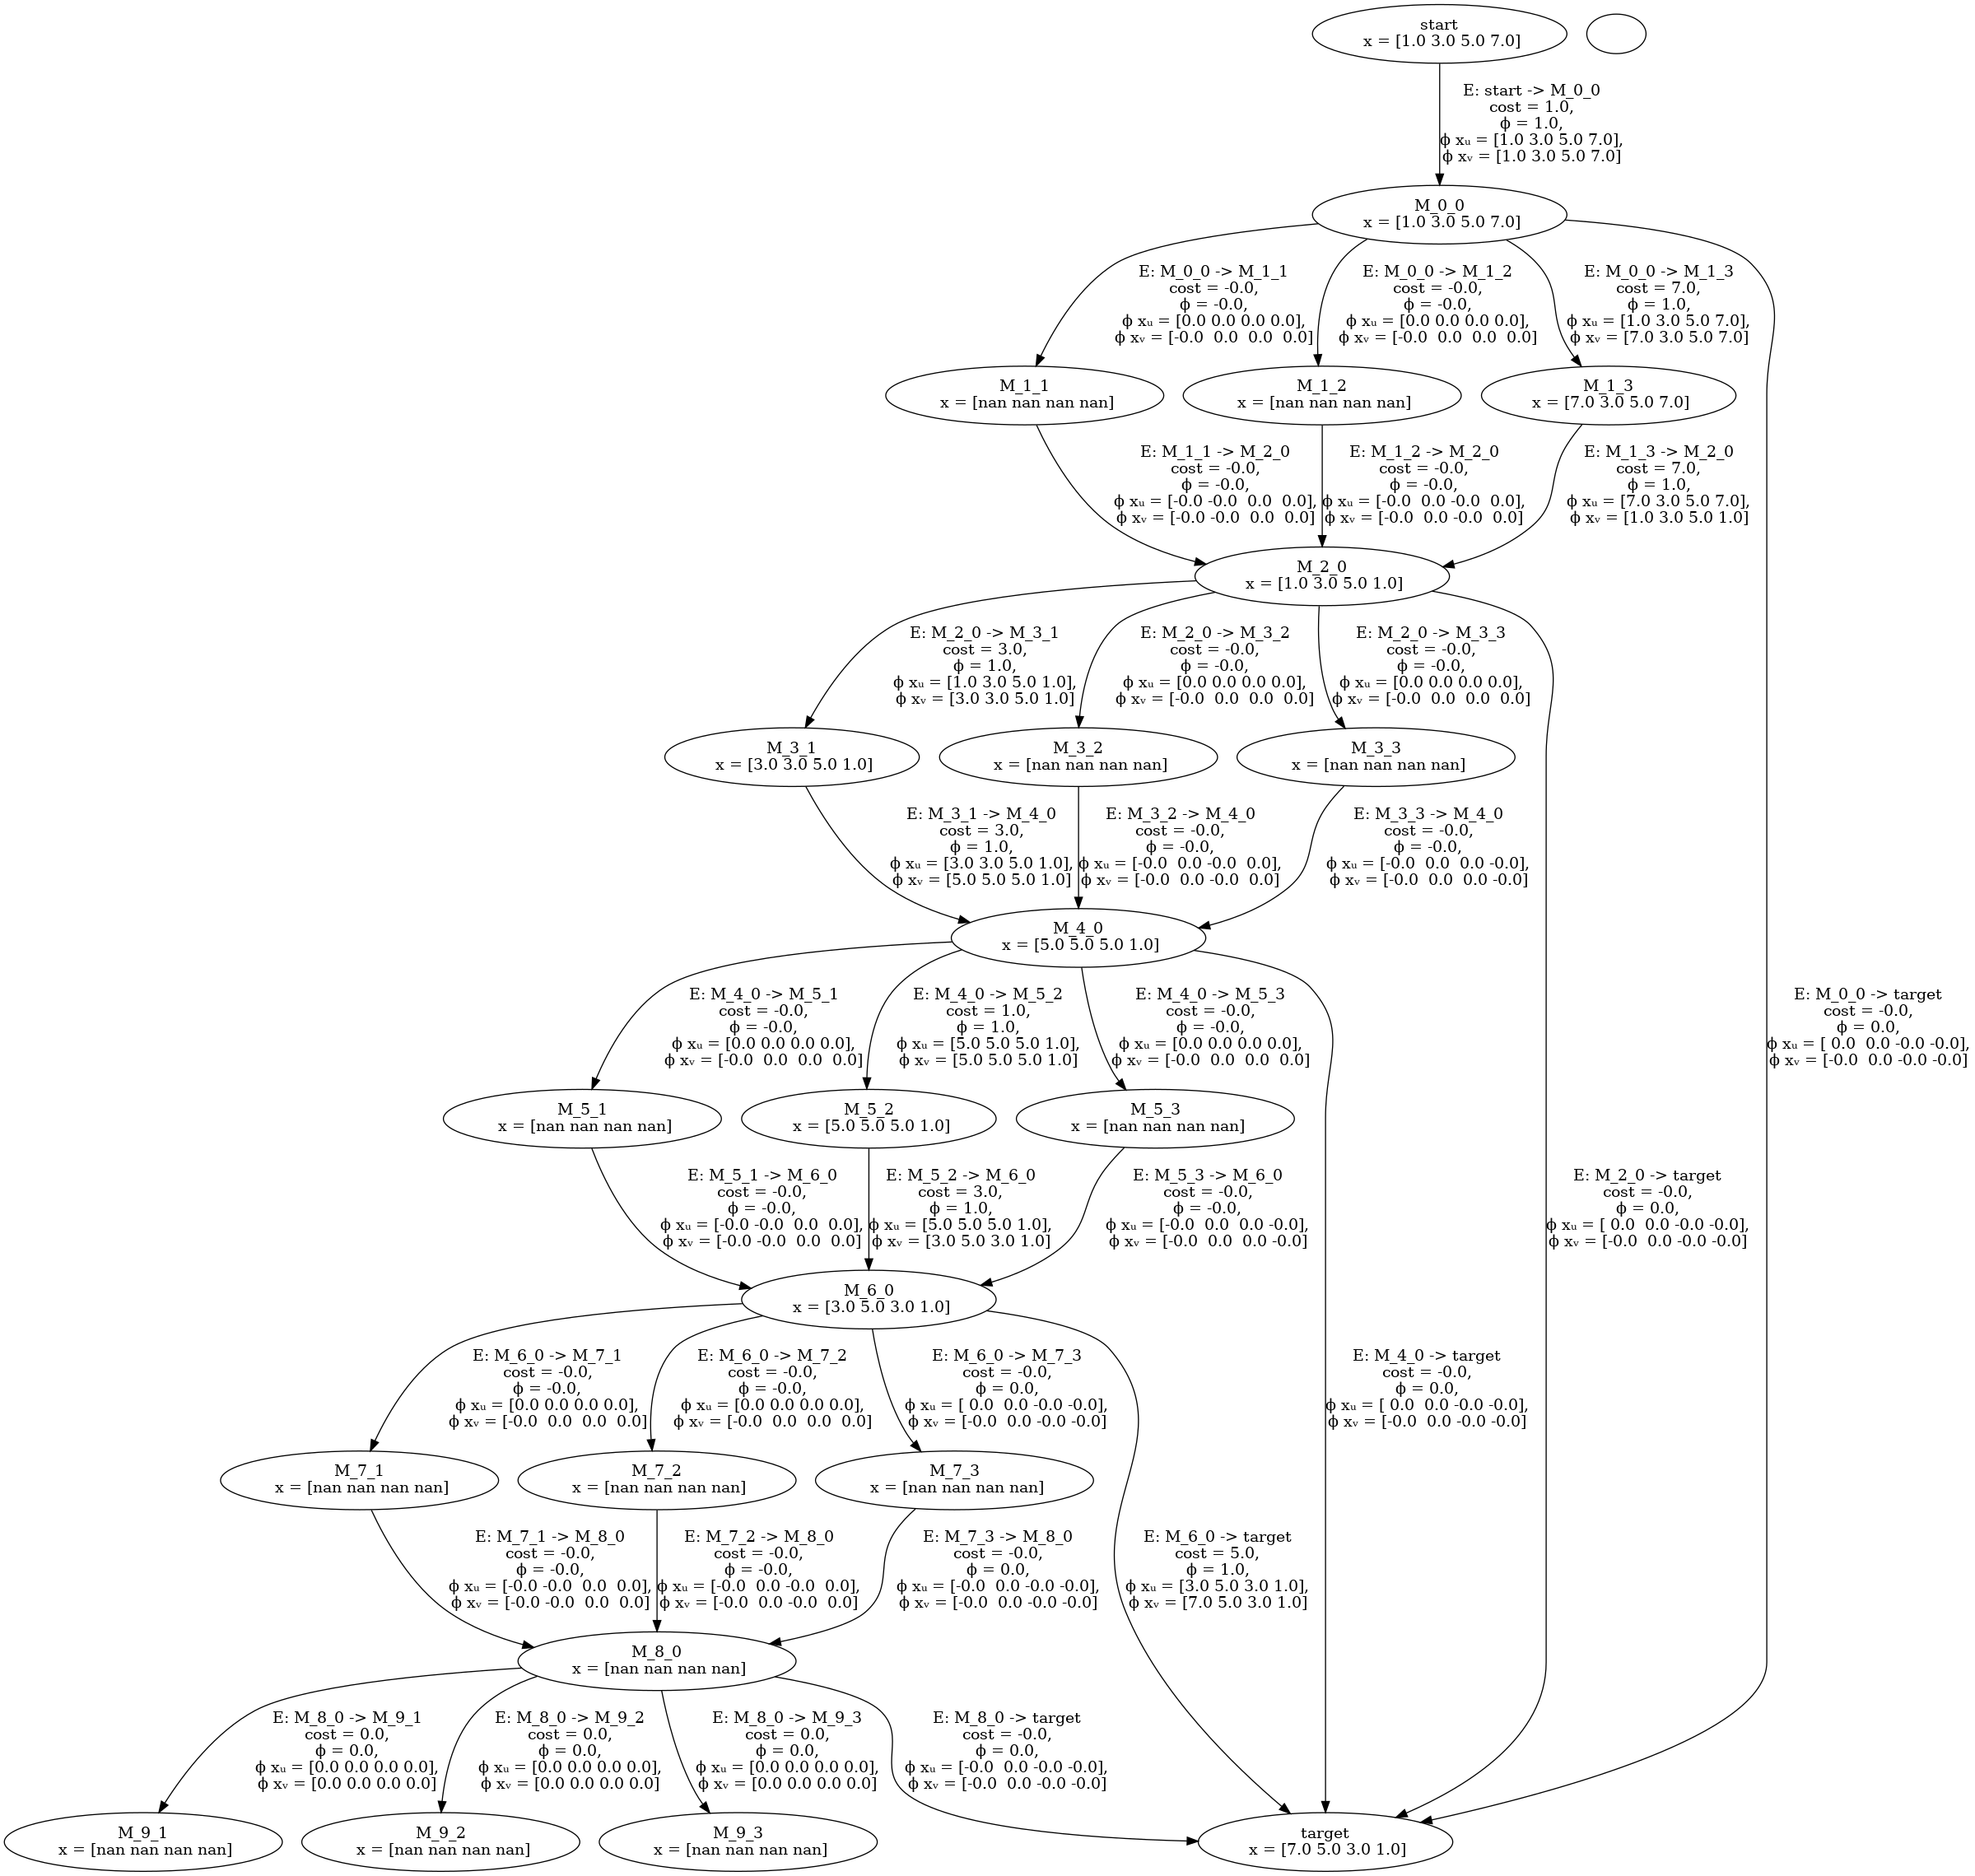

In [2]:
block_dim = 1
num_blocks = 3
horizon = 10
max_rounded_paths = 30
display_graph = True

gcs = GCSforBlocks(block_dim, num_blocks, horizon)

width = 1
ub = width * 2 * (num_blocks + 1)
gcs.set_block_width(width)
gcs.set_ub(ub)

initial_state = []
for i in range(gcs.num_modes):
    block_state = [0] * gcs.block_dim
    block_state[0] = width * (2 * i + 1)
    initial_state += block_state
initial_point = Point(np.array(initial_state))
final_state = []
for i in range(gcs.num_modes):
    block_state = [0] * gcs.block_dim
    block_state[-1] = ub - width * (2 * i + 1)
    final_state += block_state
final_point = Point(np.array(final_state))
gcs.build_the_graph(initial_point, 0, final_point, 0)
gcs.solve(max_rounded_paths=max_rounded_paths)
gcs.verbose_solution_description()
if display_graph:
    gcs.display_graph()

In [14]:
gcs.solution.get_solver_details().optimizer_time

0.0035957529908046126

In [5]:
np.linalg.norm(np.array([1, 2]))

2.23606797749979